> Notebook com o carregamento dos dados pré-processados, aplicação do GMM e utilização do PCA e t-SNE com os dados gerados pelo algoritmo de clusterização

---

#**Bibliotecas e instalações**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pickle

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# **Dicionário de variáveis**

*   **ESCOLARI**: Código para escolaridade do paciente (int = 1).

      1 – ANALFABETO

      2 – ENS. FUND. INCOMPLETO

      3 – ENS. FUND. COMPLETO

      4 – ENSINO MÉDIO

      5 – SUPERIOR

      9 – IGNORADA
*   **IDADE**: Idade do paciente (int = 3).
*   **SEXO**: Sexo do paciente (int = 1). 

      1 – MASCULINO

      2 – FEMININO
*   **UFNASC**: UF de nascimento (char = 2). Outras opções: SI - Sem informação; OP - Outro país.	
*   **UFRESID**: UF de residência (char = 2). Outras opções: OP - Outro país.
*   **IBGE**: Código da cidade de residência do paciente segundo IBGE com digito verificador (char = 7).
*   **CIDADE**: Cidade de residência do paciente (char = 200).
*   **CATEATEND**: Categoria de atendimento ao diagnóstico (int = 1). 

      1 - CONVENIO

      2 - SUS

      3 – PARTICULAR

      9 – SEM INFORMAÇÃO
*   **DTCONSULT**: Data da 1ª consulta (date = 10). Formato: DD/MM/YYYY	
*   **CLINICA**: Código da clinica (int = 2).

      1 – ALERGIA/IMUNOLOGIA

      2 – CIRURGIA CARDIACA

      3 – CIRURGIA CABEÇA E PESCOÇO

      4 – CIRURGIA GERAL

      5 – CIRURGIA PEDIATRICA

      6 – CIRURGIA PLASTICA

      7 – CIRURGIA TORAXICA

      8 – CIRURGIA VASCULAR

      9 – CLINICA MEDICA

      10 – DERMATOLOGIA

      11 – ENDOCRINOLOGIA

      12 – GASTROCIRURGIA
      
      13 – GASTROENTEROLOGIA
      
      14 – GERIATRIA
      
      15 – GINECOLOGIA
      
      16 – GINECOLOGIA / OBSTETRICIA
      
      17 – HEMATOLOGIA
      
      18 – INFECTOLOGIA
      
      19 – NEFROLOGIA
      
      20 – NEUROCIRURGIA
      
      21 – NEUROLOGIA
      
      22 – OFTALMOLOGIA
      
      23 – ONCOLOGIA CIRURGICA
      
      24 – ONCOLOGIA CLINICA
      
      25 – ONCOLOGIA PEDIATRICA
      
      26 – ORTOPEDIA
      
      27 – OTORRINOLARINGOLOGIA
      
      28 – PEDIATRIA
      
      29 – PNEUMOLOGIA
      
      30 – PROCTOLOGIA
      
      31 – RADIOTERAPIA
      
      32 – UROLOGIA
      
      33 – MASTOLOGIA
      
      34 – ONCOLOGIA CUTANEA
      
      35 – CIRURGIA PELVICA
      
      36 – CIRURGIA ABDOMINAL
      
      37 – ODONTOLOGIA
      
      38 – TRANSPLANTE HEPATICO
      
      99 – IGNORADO	
*   **DIAGPREV**: Diagnóstico e tratamento anterior (int = 1).

      1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
      
      2 – COM DIAGNÓSTICO / SEM TRATAMENTO
      
      3 – COM DIAGNÓSTICO / COM TRATAMENTO
      
      4 – OUTROS	
*   **DTDIAG**: Data do diagnóstico (date = 10). Formato: DD/MM/YYYY	
*   **BASEDIAG**: Código da base do diagnóstico (int = 1).
      
      1 – EXAME CLINICO
      
      2 – RECURSOS AUXILIARES NÃO MICROSCÓPICOS
      
      3 – CONFIRMAÇÃO MICROSCÓPICA
      
      4 – SEM INFORMAÇÃO	
*   **TOPO**: Código da topografia (char = 4). Formato: C999 	
*   **TOPOGRUP**: Grupo da topografia	(char = 3). Formato: C99	
*   **DESCTOPO**: Descrição da Topografia (char = 80).
*   **MORFO**: Código da morfologia (char = 5). Formato: 99999
*   **DESCMORFO**: Descrição da morfologia (char = 80).
*   **EC**: Estádio clínico (char = 5).
*   **ECGRUP**: Grupo do estadiamento clínico (char = 3).

      0 - Tumores primários, classificados como in situ

      I - Tumores localizados

      II - Tumores com envolvimento regional por extensão direta

      III - Tumores com envolvimento regional de linfonodos
      
      IV - Tumores com metástase à distância 

      X - Para tumores não avaliados pelo profissional responsável ou sem informação sobre estadiamento anotada no prontuário

      Y - Para tumores em que não se aplica a classificação TNM. São os tumores não sólidos (por exemplo, as leucemias)
*   **T**: Classificação TNM - T (char = 5).
*   **N**: Classificação TNM - N (char = 5).	
*   **M**: Classificação TNM - M (char = 3).	
*   **PT**: Estadiamento pós cirúrgico (char = 5).
*   **PN**: Estadiamento pós cirúrgico (char = 5).	
*   **PM**: Estadiamento pós cirúrgico (char = 3).	
*   **S**: Classificação TNM - S (int = 1). Domínio: 0; 1; 2; 3; 8 – NÃO SE APLICA; 9 – X
*   **G**: Classificação TNM – G (Grau) (char = 5). 

      Domínio (exceto C40, C41, C381, C382, C383, C47, C48 e C49):
      0; 1; 2; 3; 4; 8 – NÃO SE APLICA; 9 – X

      Domínio (somente C40, C41, C381, C382, C383, C47, C48 e C49):
      ALTO; BAIXO; 8 – NÃO SE APLICA; 9 – X
	
*   **LOCALTNM**: Classificação TNM - Localização (int = 1).
      
      1 – SUPERIOR
      
      2 – MEDIO
      
      3 – INFERIOR
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **IDMITOTIC**: Classificação TNM – Índice Mitótico (int = 1).
      
      1 – ALTA
      
      2 – BAIXA
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **PSA**: Classificação TNM - PSA (int = 1).
      
      1 – MENOR QUE 10
      
      2 – MAIOR OU IGUAL A 10 E MENOR QUE 20
      
      3 – MAIOR OU IGUAL A 20
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **GLEASON**: Classificação TNM - Gleason (int = 1).
      
      1 – MENOR OU IGUAL A 6
      
      2 – IGUAL A 7
      
      3 – MAIOR OU IGUAL A 8
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **OUTRACLA**: Outra classificação de estadiamento (char = 20).
*   **META01**: Metástase (char = 3).	Formato: C99
*   **META02**: Metástase (char = 3).	Formato: C99
*   **META03**: Metástase (char = 3).	Formato: C99
*   **META04**: Metástase (char = 3).	Formato: C99
*   **DTTRAT**: Data de inicio do tratamento (date = 10). Formato: DD/MM/YYYY	
*   **NAOTRAT**: Código da razão para não realização do tratamento (int = 1).
      
      1 – RECUSA DO TRATAMENTO
      
      2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
      
      3 – OUTRAS DOENÇAS ASSOCIADAS
      
      4 – ABANDONO DE TRATAMENTO
      
      5 – OBITO POR CANCER
      
      6 – OBITO POR OUTRAS CAUSAS, SOE
      
      7 – OUTRAS
      
      8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
      
      9 – SEM INFORMAÇÃO	
*   **TRATAMENTO**: Código de combinação dos tratamentos realizados (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado	
*   **TRATHOSP**: Código de combinação dos tratamentos realizados no hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento

      J – Nenhum tratamento realizado	
*   **TRATFANTES**: Código de combinação dos tratamentos realizados antes/durante admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **TRATFAPOS**: Código de combinação dos tratamentos realizados após admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **NENHUM**: Tratamento recebido no hospital = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURGIA**: Tratamento recebido no hospital = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIO**: Tratamento recebido no hospital = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIO**: Tratamento recebido no hospital = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMONIO**: Tratamento recebido no hospital = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMO**: Tratamento recebido no hospital = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNO**: Tratamento recebido no hospital = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROS**: Tratamento recebido no hospital = outros (int = 1). 0 – NÃO; 1 – SIM
*   **NENHUMANT**: Tratamento recebido fora do hospital e antes da admissão = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURANT**: Tratamento recebido fora do hospital e antes da admissão = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIOANT**: Tratamento recebido fora do hospital e antes da admissão = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIOANT**: Tratamento recebido fora do hospital e antes da admissão = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMOANT**: Tratamento recebido fora do hospital e antes da admissão = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMOANT**: Tratamento recebido fora do hospital e antes da admissão = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNOANT**: Tratamento recebido fora do hospital e antes da admissão = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROANT**: Tratamento recebido fora do hospital e antes da admissão = outros (int = 1). 0 – NÃO; 1 – SIM	
*   **NENHUMAPOS**: Tratamento recebido fora do hospital e durante/após admissão = nenhum	(int = 1). 0 – NÃO; 1 – SIM	
*   **CIRURAPOS**: Tratamento recebido fora do hospital e durante/após admissão = cirurgia	(int = 1). 0 – NÃO; 1 – SIM	
*   **RADIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = radioterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **QUIMIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = quimioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **HORMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = hormonioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **TMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = tmo	(int = 1). 0 – NÃO; 1 – SIM		
*   **IMUNOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = imunoterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **OUTROAPOS**: Tratamento recebido fora do hospital e durante/após admissão = outros	(int = 1). 0 – NÃO; 1 – SIM	
*   **DTULTINFO**: Data da última informação do paciente (date = 10). Formato: DD/MM/YYYY
*   **ULTINFO**: Última informação sobre o paciente (int = 1).
      
      1 – VIVO, COM CÂNCER
      
      2 – VIVO, SOE
      
      3 – OBITO POR CANCER
      
      4 – OBITO POR OUTRAS CAUSAS, SOE
*   **CONSDIAG**: Diferença em dias entre as datas de consulta o diagnóstico (num = dias).
*   **TRATCONS**: Diferença em dias entre as datas de consulta e tratamento (num = dias).	
*   **DIAGTRAT**: Diferença em dias entre as datas de tratamento e diagnóstico (num = dias).
*   **ANODIAG**: Ano de diagnóstico (int = 4). Formato: 9999
*   **CICI**: Tumor infantil (char = 5).	
*   **CICIGRUP**: Tumor infantil – Grupo (char = 80).	
*   **CICISUBGRU**: Tumor infantil – Sub grupo (char = 80).	
*   **FAIXAETAR**: Faixa etária do paciente (char = 5).	
*   **LATERALI**: Lateralidade (int = 1).
      
      1 – DIREITA
      
      2 – ESQUERDA
      
      3 – BILATERAL
      
      8 - NÃO SE APLICA	
*   **INSTORIG**: Instituição de origem (char = 200). Obrigatório somente se DIAGPREV = 03 – COM DIAGNÓSTICO / COM TRATAMENTO
*   **DRS**: Departamentos Regionais de Saúde (char = 200).
*   **RRAS**: RRAS (char = 200).	
*   **PERDASEG**: Perda de seguimento (int = 1). 
      
      0 – Não
      
      1 – Sim
      
      8 – Não se aplica (excluído do cálculo para o indicador perda de seguimento)	
*   **ERRO**: Admissão com erro (int = 1). 0 – Sem; 1 – Com
*   **DTRECIDIVA**: Data da última ocorrência de recidiva (date = 10). Formato: DD/MM/YYYY	
*   **RECNENHUM**: Sem recidiva (int = 1). 0 - Não; 1 - Sim
*   **RECLOCAL**: Recidiva local (int = 1). 0 - Não; 1 - Sim	
*   **RECREGIO**: Recidiva regional (int = 1). 0 - Não; 1 - Sim	
*   **RECDIST**: Recidiva a distância / metástase (int = 1). 0 - Não; 1 - Sim	
*   **REC01**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC02**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **REC03**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC04**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **IBGEATEN**: Código IBGE da instituição (int = 7).	
*   **CIDO**: Código da morfologia 3ª Edição (int = 5). Formato: 99999	
*   **DSCCIDO**: Descrição da morfologia 3ª Edição (char = 89).




# **Dados**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing.csv')
print(df.shape)
df.head(3)

(943659, 73)


ESCOLARI  IDADE  SEXO     IBGE  ...  REC02  REC03  REC04  IBGEATEN
0         4   40.0     2  3530805  ...      0      0      0   3509502
1         9   45.0     2  3509502  ...      0      0      0   3509502
2         2   63.0     2  3509502  ...      0      0      0   3509502

[3 rows x 73 columns]

In [4]:
df.isna().sum().sort_values(ascending=False).head()

IBGEATEN     0
RADIO        0
G            0
LOCALTNM     0
IDMITOTIC    0
dtype: int64

In [5]:
col = df.columns
X = df[col].values
X.shape

(943659, 73)

## **Normalização**

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [7]:
pd.DataFrame(data=X_norm, columns=col).describe()

ESCOLARI         IDADE  ...         REC04      IBGEATEN
count  9.436590e+05  9.436590e+05  ...  9.436590e+05  9.436590e+05
mean  -1.130038e-13 -1.080222e-14  ...  1.166343e-13 -5.947767e-13
std    1.000001e+00  1.000001e+00  ...  1.000001e+00  1.000001e+00
min   -1.146847e+00 -3.546734e+00  ... -3.526423e-02 -1.609258e+00
25%   -8.068051e-01 -5.235727e-01  ... -3.526423e-02 -1.257803e+00
50%   -4.667634e-01  1.284817e-01  ... -3.526423e-02  5.209868e-01
75%    1.573487e+00  7.212585e-01  ... -3.526423e-02  8.833563e-01
max    1.573487e+00  3.151643e+00  ...  4.023854e+01  1.129553e+00

[8 rows x 73 columns]

#**GMM**

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=7).fit(X_norm)
          for n in n_components]

In [ ]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm_models.pkl', 'wb') as handle:
    pickle.dump({'models': models}, handle)

In [11]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm_models.pkl', 'rb') as handle:
    gmm_models = pickle.load(handle)

models = gmm_models['models']
n_components = np.arange(1, 21)

In [16]:
y_bic = [m.bic(X_norm) for m in models]
y_aic = [m.aic(X_norm) for m in models]

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=n_components, y=y_bic, 
                         mode='lines+markers', name='BIC'))

fig.add_trace(go.Scatter(x=n_components, y=y_aic, 
                         mode='lines+markers', name='AIC'))

fig.update_layout(xaxis_title='Componentes', title='AIC e BIC', width=800)

fig.show()

In [20]:
k = 8

gmm = GaussianMixture(n_components =  k, covariance_type='full', random_state=7)
gmm.fit(X_norm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=8, n_init=1, precisions_init=None,
                random_state=7, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [21]:
y_cluster = gmm.predict(X_norm)
y_cluster

array([4, 1, 1, ..., 6, 1, 1])

In [22]:
df['GRUPO'] = y_cluster
df.head()

ESCOLARI  IDADE  SEXO     IBGE  ...  REC03  REC04  IBGEATEN  GRUPO
0         4   40.0     2  3530805  ...      0      0   3509502      4
1         9   45.0     2  3509502  ...      0      0   3509502      1
2         2   63.0     2  3509502  ...      0      0   3509502      1
3         9   64.0     2  3545803  ...      0      0   3509502      1
4         1   48.0     2  3530805  ...      0      0   3509502      1

[5 rows x 74 columns]

## **Salvando modelo e StandardScaler**

In [23]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm_scaler.pkl', 'wb') as handle:
    pickle.dump({'scaler': scaler}, handle)

In [24]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm.pkl', 'wb') as handle:
    pickle.dump({'gmm': gmm}, handle)

## **Salvando os dados**

In [25]:
df.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_preprocessing.csv', encoding='utf-8', index=False)

# **Dados GMM**

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_preprocessing.csv')
print(df.shape)
df.head(3)

(943659, 74)


ESCOLARI  IDADE  SEXO     IBGE  ...  REC03  REC04  IBGEATEN  GRUPO
0         4   40.0     2  3530805  ...      0      0   3509502      4
1         9   45.0     2  3509502  ...      0      0   3509502      1
2         2   63.0     2  3509502  ...      0      0   3509502      1

[3 rows x 74 columns]

In [27]:
k = len(df.GRUPO.unique())
k # clusters

8

In [28]:
df.GRUPO.value_counts()

5    290783
1    268392
4    205070
0     57489
6     38185
2     33848
3     31756
7     18136
Name: GRUPO, dtype: int64

# **Teste 1**

In [29]:
n_samples = 10000 # samples from dataset

df_subset1 = df.sample(n_samples, random_state=7).sort_index().copy()
df_subset1.GRUPO.value_counts()

5    3109
1    2782
4    2121
0     624
6     418
2     391
3     360
7     195
Name: GRUPO, dtype: int64

In [30]:
cols = df.columns
cols = cols.drop(['GRUPO'])
len(cols)

73

In [31]:
df_subset1[cols].shape

(10000, 73)

## **Normalização**



In [32]:
X = df_subset1[cols].values
X.shape

(10000, 73)

In [33]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [34]:
pd.DataFrame(data=X_norm, columns=cols).describe()

ESCOLARI         IDADE  ...         REC04      IBGEATEN
count  1.000000e+04  1.000000e+04  ...  1.000000e+04  1.000000e+04
mean  -8.859358e-16  8.159029e-16  ...  5.807591e-16  1.125388e-14
std    1.000050e+00  1.000050e+00  ...  1.000050e+00  1.000050e+00
min   -1.133870e+00 -3.550412e+00  ... -3.404664e-02 -1.595557e+00
25%   -7.944184e-01 -5.284620e-01  ... -3.404664e-02 -1.244990e+00
50%   -4.549669e-01  1.233311e-01  ... -3.404664e-02  5.293036e-01
75%    1.581742e+00  7.158703e-01  ... -3.404664e-02  8.907569e-01
max    1.581742e+00  2.493488e+00  ...  4.719193e+01  1.136332e+00

[8 rows x 73 columns]

## **PCA e TSNE**

In [35]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset1['pca_one'] = pca_result[:,0]
df_subset1['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.14042168544416045


In [36]:
fig = px.scatter(df_subset1, x="pca_one", y="pca_two", color=df_subset1.GRUPO.astype(str),
                 height=700, width=1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [37]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9562726181856745


In [38]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset1['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset1['tsne_pca50_two'] = tsne_pca_results[:,1]

In [40]:
fig = px.scatter(df_subset1, x="tsne_pca50_one", y="tsne_pca50_two", color=df_subset1.GRUPO.astype(str),
                 height=700, width = 1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [41]:
df_gmm = pd.DataFrame()
df_gmm['tsne_pca50_one'] = df_subset1['tsne_pca50_one'].copy()
df_gmm['tsne_pca50_two'] = df_subset1['tsne_pca50_two'].copy()
df_gmm['grupo_gmm'] = df_subset1['GRUPO'].copy()
df_gmm.reset_index(inplace=True)
df_gmm.head()

index  tsne_pca50_one  tsne_pca50_two  grupo_gmm
0     47       36.003864       -8.416125          4
1     84      -10.595718      -22.636055          1
2    113      -20.674870       63.171303          0
3    176       14.559534       22.279612          5
4    232       18.240608       33.595531          5

In [42]:
df_gmm.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_tsne.csv', encoding='utf-8', index=False)

# **Teste 2**

In [43]:
n_samples = 10000 # samples from dataset

df_subset2 = df.sample(n_samples, random_state=0).sort_index().copy()
df_subset2.GRUPO.value_counts()

5    3198
1    2729
4    2222
0     555
6     403
2     386
3     319
7     188
Name: GRUPO, dtype: int64

In [44]:
cols = df.columns
cols = cols.drop(['GRUPO'])
len(cols)

73

In [45]:
df_subset2[cols].shape

(10000, 73)

## **Normalização**



In [46]:
X = df_subset2[cols].values
X.shape

(10000, 73)

In [47]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [48]:
pd.DataFrame(data=X_norm, columns=cols).describe()

ESCOLARI         IDADE  ...         REC04      IBGEATEN
count  1.000000e+04  1.000000e+04  ...  1.000000e+04  1.000000e+04
mean   9.225078e-15 -1.686873e-16  ...  1.347270e-16  6.128364e-15
std    1.000050e+00  1.000050e+00  ...  1.000050e+00  1.000050e+00
min   -1.139877e+00 -3.482857e+00  ... -3.457056e-02 -1.611706e+00
25%   -7.994832e-01 -5.722489e-01  ... -3.457056e-02 -1.259807e+00
50%   -4.590893e-01  1.262971e-01  ... -3.457056e-02  5.212272e-01
75%    1.583274e+00  7.084188e-01  ... -3.457056e-02  8.840539e-01
max    1.583274e+00  2.338359e+00  ...  4.886457e+01  1.130562e+00

[8 rows x 73 columns]

## **PCA e TSNE**

In [49]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset2['pca_one'] = pca_result[:,0]
df_subset2['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.13966207359937122


In [50]:
fig = px.scatter(df_subset2, x="pca_one", y="pca_two", color=df_subset2.GRUPO.astype(str),
                 height=700, width=1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [51]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9576043269757541


In [52]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset2['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset2['tsne_pca50_two'] = tsne_pca_results[:,1]

In [53]:
fig = px.scatter(df_subset2, x="tsne_pca50_one", y="tsne_pca50_two", color=df_subset2.GRUPO.astype(str),
                 height=700, width = 1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [54]:
#df_gmm = pd.DataFrame()
#df_gmm['tsne_pca50_one'] = df_subset2['tsne_pca50_one'].copy()
#df_gmm['tsne_pca50_two'] = df_subset2['tsne_pca50_two'].copy()
#df_gmm['grupo_gmm'] = df_subset2['GRUPO'].copy()
#df_gmm.reset_index(inplace=True)
#df_gmm.head()

In [55]:
#df_gmm.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_tsne.csv', encoding='utf-8', index=False)

# **Teste 3**

In [56]:
n_samples = 10000 # samples from dataset

df_subset3 = df.sample(n_samples, random_state=3).sort_index().copy()
df_subset3.GRUPO.value_counts()

5    3014
1    2926
4    2124
0     619
6     417
2     366
3     337
7     197
Name: GRUPO, dtype: int64

In [57]:
cols = df.columns
cols = cols.drop(['GRUPO'])
len(cols)

73

In [58]:
df_subset3[cols].shape

(10000, 73)

## **Normalização**



In [59]:
X = df_subset3[cols].values
X.shape

(10000, 73)

In [60]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [61]:
pd.DataFrame(data=X_norm, columns=cols).describe()

ESCOLARI         IDADE  ...         REC04      IBGEATEN
count  1.000000e+04  1.000000e+04  ...  1.000000e+04  1.000000e+04
mean   5.181211e-15 -1.075251e-16  ...  2.149701e-15  6.699952e-15
std    1.000050e+00  1.000050e+00  ...  1.000050e+00  1.000050e+00
min   -1.148672e+00 -3.539293e+00  ... -4.024634e-02 -1.608712e+00
25%   -8.075061e-01 -5.102459e-01  ... -4.024634e-02 -1.256718e+00
50%   -4.663400e-01  1.430779e-01  ... -4.024634e-02  5.248028e-01
75%    1.580657e+00  6.776156e-01  ... -4.024634e-02  8.877284e-01
max    1.580657e+00  2.281228e+00  ...  3.382654e+01  1.134303e+00

[8 rows x 73 columns]

## **PCA e TSNE**

In [62]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset3['pca_one'] = pca_result[:,0]
df_subset3['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.14068031832086728


In [63]:
fig = px.scatter(df_subset3, x="pca_one", y="pca_two", color=df_subset3.GRUPO.astype(str),
                 height=700, width=1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [64]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.95541977661245


In [65]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset3['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset3['tsne_pca50_two'] = tsne_pca_results[:,1]

In [66]:
fig = px.scatter(df_subset3, x="tsne_pca50_one", y="tsne_pca50_two", color=df_subset3.GRUPO.astype(str),
                 height=700, width = 1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [67]:
#df_gmm = pd.DataFrame()
#df_gmm['tsne_pca50_one'] = df_subset3['tsne_pca50_one'].copy()
#df_gmm['tsne_pca50_two'] = df_subset3['tsne_pca50_two'].copy()
#df_gmm['grupo_gmm'] = df_subset3['GRUPO'].copy()
#df_gmm.reset_index(inplace=True)
#df_gmm.head()

In [68]:
#df_gmm.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_tsne.csv', encoding='utf-8', index=False)

# **Resultados**

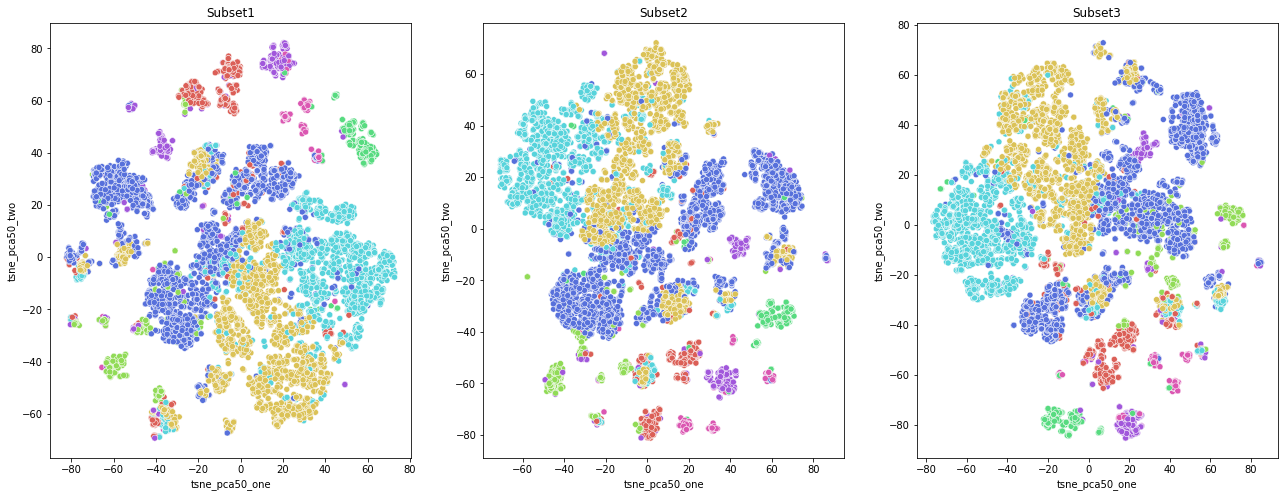

In [95]:
plt.figure(figsize=(22,8))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset1,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset2,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset3,
    ax=ax3
)

ax1.title.set_text('Subset1')
ax2.title.set_text('Subset2')
ax3.title.set_text('Subset3')
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

plt.show()

# **Balanceado**

In [82]:
df_test = df[df.GRUPO == 7][:1500].copy()
n = df_test.shape[0]
for i in range(k):
  if i != 7:
    df_aux = df[df.GRUPO == i].sample(n, random_state=7).copy()
    df_test = pd.concat([df_test, df_aux])

df_test.GRUPO.value_counts().sort_index()

0    1500
1    1500
2    1500
3    1500
4    1500
5    1500
6    1500
7    1500
Name: GRUPO, dtype: int64

In [83]:
cols = df_test.columns
cols = cols.drop(['GRUPO'])
len(cols)

73

In [84]:
X = df_test[cols].values
X.shape

(12000, 73)

In [85]:
s = StandardScaler()
X_norm = s.fit_transform(X)

In [86]:
pd.DataFrame(data=X_norm, columns=cols).describe()

ESCOLARI         IDADE  ...         REC04      IBGEATEN
count  1.200000e+04  1.200000e+04  ...  1.200000e+04  1.200000e+04
mean  -1.165383e-15 -1.057904e-15  ... -1.632612e-15  2.300327e-15
std    1.000042e+00  1.000042e+00  ...  1.000042e+00  1.000042e+00
min   -1.108405e+00 -2.439539e+00  ... -5.111666e-02 -1.802952e+00
25%   -7.600870e-01 -4.075086e-01  ... -5.111666e-02 -5.957811e-01
50%   -4.117694e-01  2.246786e-01  ... -5.111666e-02  7.755900e-01
75%    2.848657e-01  7.213970e-01  ... -5.111666e-02  8.031853e-01
max    1.678136e+00  2.121240e+00  ...  2.366849e+01  1.060595e+00

[8 rows x 73 columns]

In [87]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_test['pca_one'] = pca_result[:,0]
df_test['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.16366152063700817


In [88]:
fig = px.scatter(df_test, x="pca_one", y="pca_two", color=df_test.GRUPO.astype(str),
                 height=700, width=1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [89]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9588207692570906


In [90]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_test['tsne_pca50_one'] = tsne_pca_results[:,0]
df_test['tsne_pca50_two'] = tsne_pca_results[:,1]

In [91]:
fig = px.scatter(df_test, x="tsne_pca50_one", y="tsne_pca50_two", color=df_test.GRUPO.astype(str),
                 height=700, width = 1000
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

# **Referências**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f

https://towardsdatascience.com/t-sne-python-example-1ded9953f26

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://distill.pub/2016/misread-tsne/